In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\D1D2\coords_csv\CoordD1_M1_P2_7_17_24_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\D1\video_time\D1_M1_P2_7_17_24_video_time0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\D1\stimulus_time\D1_M1_P2_7_17_24_stimulus_time0.csv'

north_pixel = 115
south_pixel = 436
east_pixel = 487
west_pixel = 146
shelter_x_pixel = 170
shelter_y_pixel = 285

#estimate for when mouse reaches shelter
escape_done = 4.3 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False
##small_angle = 

In [4]:
#read in DLC data, convert to cm, center platform at 0,0
shelter_x, shelter_y, x_diam, y_diam, coord_scaled = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [5]:
#replace any head, nose, or center points with likelihood < .9 with NA
filter_data(.8, coord_scaled)

In [6]:
#coord_filtered

In [7]:
timestamp_df = convert_time(time_path, coord_scaled, audio_path, 1)

In [8]:
coord_scaled.tail()

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,center_x,center_y,center_likelihood,spine2_x,spine2_y,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set
9966,9966,9966,-16.897573,23.341483,0.000832,-20.673833,23.777909,0.000594,-30.321720,-3.290651,...,-13.816701,26.710581,0.000132,46.006831,-10.126988,0.000058,-30.667724,-0.650924,0.005355,34.984615
9967,9967,9967,-16.897573,23.341483,0.000334,-20.673833,23.777909,0.000194,-30.328733,-3.290651,...,-13.816701,26.710581,0.000055,45.982647,-10.126988,0.000010,-30.714370,-0.650924,0.003562,35.026419
9968,9968,9968,-16.897573,23.341483,0.000764,-20.673833,23.777909,0.000292,-30.335125,-3.290651,...,-13.816701,26.710581,0.000076,45.982647,-10.120490,0.000027,-30.714370,-0.650924,0.008571,35.064960
9969,9969,9969,-16.897573,23.341483,0.000451,-20.673833,23.777909,0.000082,-30.369709,-3.290651,...,-13.816701,26.710581,0.000062,45.955646,-10.120490,0.000008,-30.732252,-0.650924,0.005417,35.104730
9970,9970,9970,-16.897573,23.341483,0.000601,-20.673833,23.777909,0.000091,-30.433024,-3.440505,...,-13.816701,26.710581,0.000084,45.918732,-10.181220,0.000007,-30.768798,-0.754963,0.007257,35.144730


In [9]:
#REPLACE ONCE WE HAVE STIMULUS TIMESTAMPS
#returns start and stop times of stimulus.
#start, stimulus_end = audio_timing(stimulus_start, stimulus_end, audio_path, coord_scaled['time'].iloc[-1])

In [10]:
#find time stimulus ends and mouse reaches shelter(escape) if stimulus is set to 0s
#end, escape = time_set_zero(start, stimulus_end, escape_done, coord_scaled)

In [11]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)

In [12]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
total_distance = speed(coord_scaled)

In [13]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)

In [14]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)

In [15]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
escape_only, four_second, six_second, long_range, escape_estimate = dataframe_ranges(-7, 14, escape_done,coord_scaled)

In [16]:
long_range

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
8917,8917,8917,2.866833,27.698872,0.001742,6.645393,29.796500,0.989827,5.866071,29.626377,...,0.999760,4.895476,24.214404,0.999343,-6.985574,40.699703,5.429775,0.214063,0.198894,0.815160
8918,8918,8918,2.808135,27.691927,0.001893,6.585178,29.756664,0.991004,5.770274,29.596500,...,0.999763,4.943271,24.201420,0.999337,-6.945817,40.694004,0.872111,0.034672,0.205607,0.168832
8919,8919,8919,2.749436,27.684983,0.004172,6.562217,29.725980,0.994439,5.748868,29.472186,...,0.999821,5.012641,24.198642,0.997924,-6.905817,40.751504,1.945535,0.077821,0.214191,0.214599
8920,8920,8920,2.690738,27.678038,0.023075,6.349228,29.350581,0.997320,5.548375,29.156252,...,0.999856,5.348090,24.008976,0.996421,-6.865817,40.641081,6.484320,0.259373,0.273421,1.480772
8921,8921,8921,2.632040,27.671094,0.342207,6.070325,29.016913,0.999549,5.267638,28.685541,...,0.999817,5.747634,23.774882,0.991822,-6.825062,40.459536,7.339365,0.299116,0.327364,1.323579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9437,9437,9437,-29.223185,-2.651114,0.020676,-31.583905,-2.494025,0.999892,-31.428360,-3.327326,...,0.999996,-26.731089,0.261183,0.999997,13.819379,4.925474,0.000000,0.000000,0.740913,-1.005403
9438,9438,9438,-29.260534,-2.554320,0.017701,-31.583905,-2.494025,0.999885,-31.428360,-3.327326,...,0.999994,-26.724306,0.261183,0.999997,13.860096,4.929086,0.106679,0.004344,0.700414,-0.994645
9439,9439,9439,-29.297883,-2.457527,0.016944,-31.583905,-2.503699,0.999891,-31.416177,-3.354170,...,0.999993,-26.724306,0.261183,0.999996,13.899687,4.929404,0.009668,0.000383,0.655370,-1.137731
9440,9440,9440,-29.335233,-2.360733,0.019144,-31.586509,-2.518226,0.999838,-31.416177,-3.354170,...,0.999992,-26.729347,0.258039,0.999996,13.939418,4.929632,0.010305,0.000409,0.607128,-1.214213


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

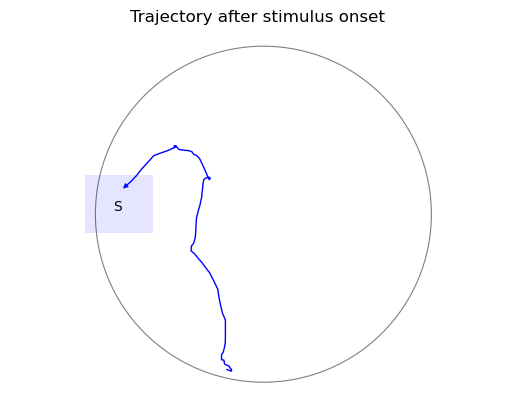

In [17]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

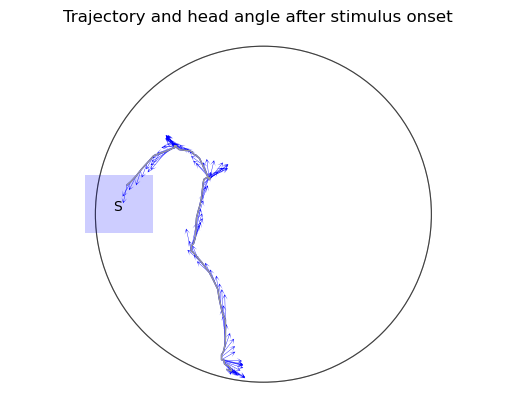

In [18]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, escape_only)

In [19]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
9092,9092,9092,-4.073129,-30.495482,0.110160,-4.965004,-30.196936,0.995681,-4.338888,-29.789016,...,0.999957,-8.073830,-24.921758,0.999985,0.017997,35.832671,8.437686,0.351767,2.479798,-1.777850
9093,9093,9093,-3.624250,-30.541496,0.598679,-4.378877,-30.240089,0.999488,-3.787639,-29.822537,...,0.999980,-7.997009,-25.155780,0.999978,0.055975,36.119506,9.855411,0.374289,2.548762,1.815892
9094,9094,9094,-3.175372,-30.587510,0.428722,-3.779991,-30.240089,0.998765,-3.246527,-29.822537,...,0.999985,-7.827027,-25.658958,0.999991,0.095962,36.435118,9.492638,0.379582,2.702959,3.856188
9095,9095,9095,-2.726493,-30.633524,0.240488,-3.517951,-30.240089,0.994333,-3.058230,-29.789016,...,0.999940,-7.827027,-25.658958,0.999993,0.137971,36.506686,3.053354,0.128268,2.648211,-1.303254
9096,9096,9096,-2.277615,-30.679537,0.987009,-3.517951,-30.088914,0.998522,-3.058230,-29.763751,...,0.999985,-7.827027,-25.658958,0.999994,0.181453,36.506686,0.000000,0.000000,2.633527,-0.337694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9194,9194,9194,-23.955675,5.476084,0.921416,-23.439474,6.826612,0.999983,-22.577992,6.197702,...,0.999985,-18.063788,11.570750,0.999979,4.096960,9.140299,42.566102,1.703197,0.138604,2.880471
9195,9195,9195,-24.768276,4.099037,0.964139,-24.297834,5.538114,0.999999,-23.472153,5.013492,...,0.999995,-19.500805,10.746909,0.999970,4.137011,7.496140,41.539143,1.663684,0.156760,0.453335
9196,9196,9196,-25.976751,3.328514,0.820549,-25.290750,4.657399,0.999994,-24.523122,3.920355,...,0.999984,-20.529646,9.834037,0.999985,4.178624,6.104903,33.617749,1.398935,0.165782,0.216813
9197,9197,9197,-26.870551,2.416634,0.976569,-26.084048,3.803308,0.999988,-25.283288,3.093672,...,0.999981,-21.691089,9.046679,0.999998,4.217242,4.731534,36.494914,1.409361,0.454610,7.479094


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

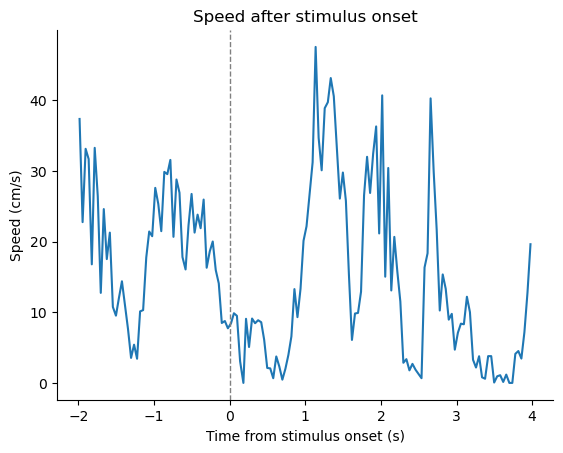

In [20]:
speed_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

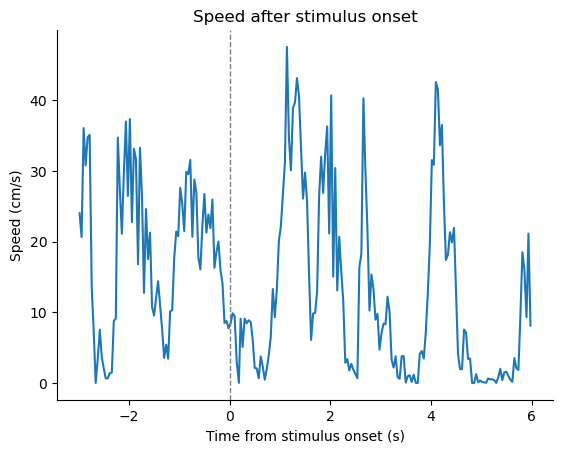

In [21]:
speed_figure(six_second['time_set'].iloc[-1],4, six_second)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

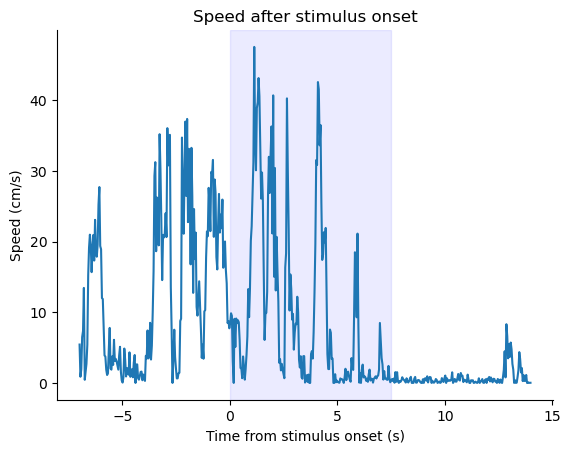

In [22]:
speed_figure(7.5,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

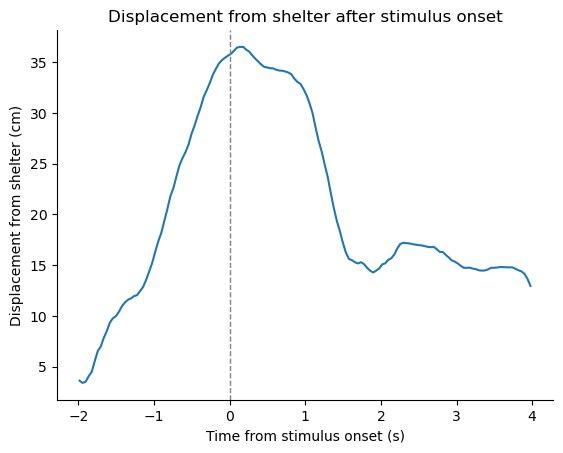

In [23]:
displacement_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

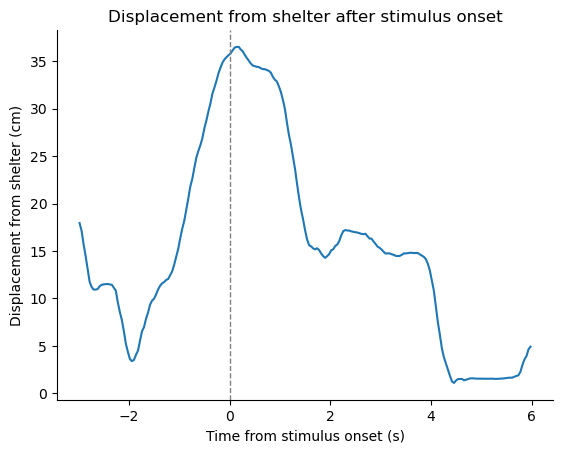

In [24]:
displacement_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

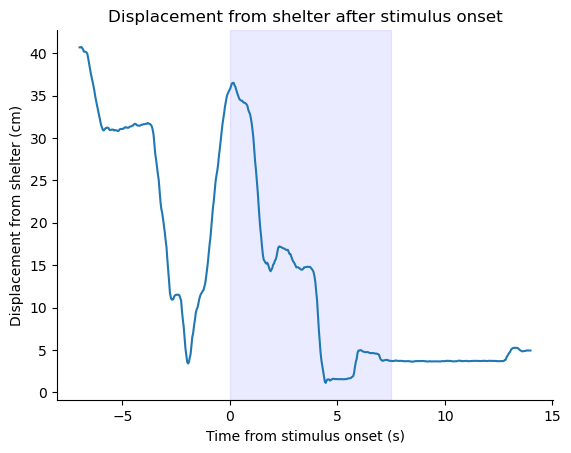

In [25]:
displacement_figure(7.5,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

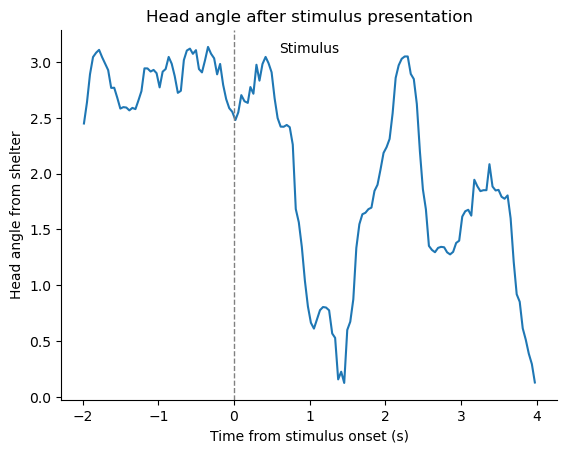

In [26]:
head_angle_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

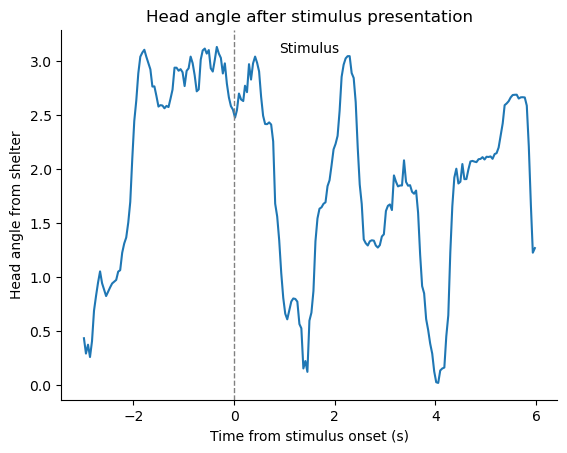

In [27]:
head_angle_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

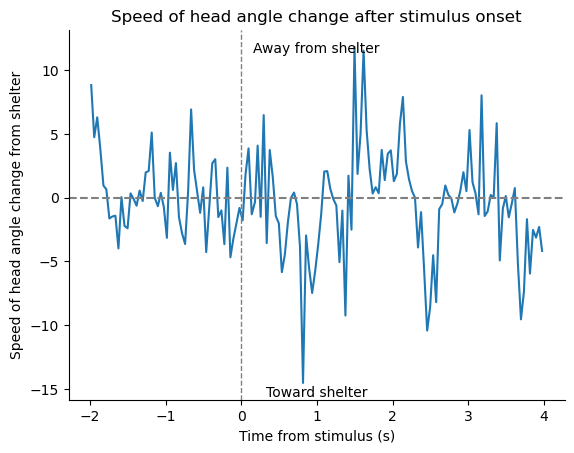

In [28]:
angle_speed_figure(four_second['time_set'].iloc[-1], 4,four_second)

In [29]:
ratio, initial_displacement, total_distance = linearity_ratio(escape_only)

In [30]:
#shelter_rotation(shelter_x, shelter_y, escape_only)

In [31]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
9092,9092,9092,-4.073129,-30.495482,0.110160,-4.965004,-30.196936,0.995681,-4.338888,-29.789016,...,0.999957,-8.073830,-24.921758,0.999985,0.017997,35.832671,8.437686,0.351767,2.479798,-1.777850
9093,9093,9093,-3.624250,-30.541496,0.598679,-4.378877,-30.240089,0.999488,-3.787639,-29.822537,...,0.999980,-7.997009,-25.155780,0.999978,0.055975,36.119506,9.855411,0.374289,2.548762,1.815892
9094,9094,9094,-3.175372,-30.587510,0.428722,-3.779991,-30.240089,0.998765,-3.246527,-29.822537,...,0.999985,-7.827027,-25.658958,0.999991,0.095962,36.435118,9.492638,0.379582,2.702959,3.856188
9095,9095,9095,-2.726493,-30.633524,0.240488,-3.517951,-30.240089,0.994333,-3.058230,-29.789016,...,0.999940,-7.827027,-25.658958,0.999993,0.137971,36.506686,3.053354,0.128268,2.648211,-1.303254
9096,9096,9096,-2.277615,-30.679537,0.987009,-3.517951,-30.088914,0.998522,-3.058230,-29.763751,...,0.999985,-7.827027,-25.658958,0.999994,0.181453,36.506686,0.000000,0.000000,2.633527,-0.337694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9194,9194,9194,-23.955675,5.476084,0.921416,-23.439474,6.826612,0.999983,-22.577992,6.197702,...,0.999985,-18.063788,11.570750,0.999979,4.096960,9.140299,42.566102,1.703197,0.138604,2.880471
9195,9195,9195,-24.768276,4.099037,0.964139,-24.297834,5.538114,0.999999,-23.472153,5.013492,...,0.999995,-19.500805,10.746909,0.999970,4.137011,7.496140,41.539143,1.663684,0.156760,0.453335
9196,9196,9196,-25.976751,3.328514,0.820549,-25.290750,4.657399,0.999994,-24.523122,3.920355,...,0.999984,-20.529646,9.834037,0.999985,4.178624,6.104903,33.617749,1.398935,0.165782,0.216813
9197,9197,9197,-26.870551,2.416634,0.976569,-26.084048,3.803308,0.999988,-25.283288,3.093672,...,0.999981,-21.691089,9.046679,0.999998,4.217242,4.731534,36.494914,1.409361,0.454610,7.479094


In [32]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coord_scaled)

In [33]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
9092,9092,9092,-4.073129,-30.495482,0.110160,-4.965004,-30.196936,0.995681,-4.338888,-29.789016,...,0.999957,-8.073830,-24.921758,0.999985,0.017997,35.832671,8.437686,0.351767,2.479798,-1.777850
9093,9093,9093,-3.624250,-30.541496,0.598679,-4.378877,-30.240089,0.999488,-3.787639,-29.822537,...,0.999980,-7.997009,-25.155780,0.999978,0.055975,36.119506,9.855411,0.374289,2.548762,1.815892
9094,9094,9094,-3.175372,-30.587510,0.428722,-3.779991,-30.240089,0.998765,-3.246527,-29.822537,...,0.999985,-7.827027,-25.658958,0.999991,0.095962,36.435118,9.492638,0.379582,2.702959,3.856188
9095,9095,9095,-2.726493,-30.633524,0.240488,-3.517951,-30.240089,0.994333,-3.058230,-29.789016,...,0.999940,-7.827027,-25.658958,0.999993,0.137971,36.506686,3.053354,0.128268,2.648211,-1.303254
9100,9100,9100,-4.999190,-30.219587,0.884937,-5.240058,-29.390277,0.999094,-4.367139,-29.131757,...,0.999991,-8.324460,-24.739675,0.999992,0.336103,35.368848,8.444576,0.337783,2.832503,-3.561246
9101,9101,9101,-4.999190,-30.036045,0.716274,-5.678751,-29.296567,0.999584,-4.866385,-29.131757,...,0.999991,-8.324460,-24.424811,0.999993,0.376103,35.074998,8.870540,0.354822,2.981783,3.732007
9168,9168,9168,-18.811133,13.459573,0.844301,-18.072509,12.799185,0.999995,-18.378236,12.015394,...,0.999995,-11.974823,11.140878,0.999986,3.057075,14.927489,8.383440,0.331900,1.663333,1.206714
9169,9169,9169,-18.925890,13.577548,0.809337,-18.337439,13.066173,0.999989,-18.751437,12.281059,...,0.999997,-12.446202,11.523196,0.999983,3.096666,14.738797,8.299748,0.328595,1.676297,0.327443
9170,9170,9170,-19.046392,13.813636,0.645072,-18.529673,13.431493,0.999993,-19.005665,12.668974,...,1.000000,-12.749199,11.685414,0.999996,3.136691,14.747210,12.191799,0.487977,1.623981,-1.307096
9171,9171,9171,-19.166893,14.049724,0.340679,-18.825201,13.587767,0.999994,-19.219178,12.750425,...,1.000000,-12.929457,11.727389,0.999999,3.176743,14.754008,10.009166,0.400887,1.945075,8.016934


In [34]:
rotate, shelter_rotate_x, shelter_rotate_y = rotate_trajectory(shelter_x, shelter_y, escape_only)
normalized_df, shelter_normalized_x, shelter_normalized_y, combined_range = normalize_rotation(rotate, shelter_rotate_x, shelter_rotate_y)

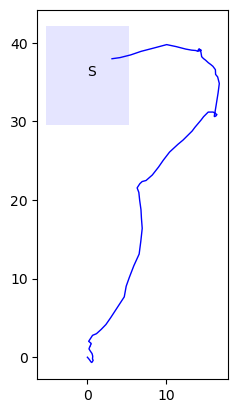

In [35]:
fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)


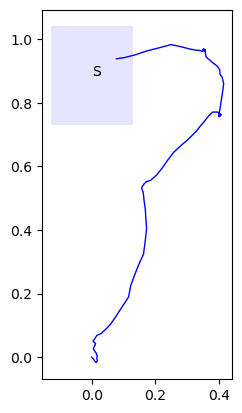

In [36]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
x = normalized_df['x']
y = normalized_df['y']

ax.text(shelter_normalized_x,shelter_normalized_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_normalized_x - 5.25/combined_range), (shelter_normalized_y-6.25/combined_range)), 10.5/combined_range,12.5/combined_range,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)

In [37]:
rotate

,rotated_x,rotated_y
0,0.000000,0.000000
1,0.241412,-0.286029
2,0.455315,-0.599602
3,0.562749,-0.669678
4,0.562749,-0.669678
...,...,...
102,8.441863,39.336954
103,6.831850,38.917787
104,5.508165,38.465152
105,4.141551,38.120676
